In [1]:
#This code doing calssification of Human Daily Activities acording to data gotten from smartwatch accelerometer.
#Data are copied from: https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset+
#Models for classification are Deep Neural Network and Random Forest Classifier
#Created by: Dusan Radivojevic 05.2020
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#Import data from row files to pandas DataFrame
accel_data = pd.DataFrame()
def Imp_File(Nf):
    global accel_data
    accel_data = pd.read_csv('https://raw.githubusercontent.com/DusanRandD/Human-Activity-Recognition/master/Dataset/data_'+Nf+'_accel_watch.txt', names=['Subject_id', 'Activity_Label', 'Timestamp', 'x','y','z'])
    accel_data.head()


In [2]:
#Return number that represent some activity
def Activ (No):
    lista={
        'A': 0,     #walking 
        'B': 1,     #jogging 
        'C': 2,     #stairs 
        'D': 3,     #sitting 
        'E': 4,     #standing 
        'G': 5,     #brushing teeth
        'O': 6,     #playing cath(tennis ball)
        'P': 7,     #dribling basketball
        'Q': 8,     #writting
        'S': 9      #floding clothes
    }
    return lista.get(No)

Alo=[]                 #train result
Ad=[]                  #train data
Adt=[]                 #validation data
Alot=[]                #validation result
Adtest=[]              #test data
Alotest=[]             #test result

#Data collect from DataFrame and separate them to training, validation and test data set
def Prep_Data(ac,nf):
    global Ad
    global Alo
    global Adt
    global Alot
    Y=accel_data['y']
    X=accel_data['x']
    Z=accel_data['z']
    AL=accel_data['Activity_Label']
    Ads=[]
    Adsx=[]
    Adsy=[]
    Adsz=[]
    k=0
    k=int(k)
    for i in range (len(accel_data['Subject_id'])):
        if (k<3400):
            if (AL[i]==ac):
                zsemi=Z[i]
                Adsx.append(X[i])
                Adsy.append(Y[i]) 
                Adsz.append(zsemi[:-1])
                k=k+1
                if (nf<46):
                    if (k%100==0):
                        Ads=np.concatenate((Adsx,Adsy),axis=None)
                        Ads=np.concatenate((Ads,Adsz),axis=None)
                        if (k==3400):
                            Adt.append(Ads)
                            Adsx=[]
                            Adsy=[]
                            Adsz=[]
                            Alot.append(Activ(ac))
                        else:
                            Ad.append(Ads)
                            Adsx=[]
                            Adsy=[]
                            Adsz=[]
                            Alo.append(Activ(ac))
                else:
                    if (k%100==0):
                        Ads=np.concatenate((Adsx,Adsy),axis=None)
                        Ads=np.concatenate((Ads,Adsz),axis=None)
                        Adtest.append(Ads)
                        Adsx=[]
                        Adsy=[]
                        Adsz=[]
                        Alotest.append(Activ(ac))


In [3]:
#List of activites and list of files to read
Ac_List=['A','B','C','D','E','G','O','P','Q','S']
File_List=['1600','1601','1602','1603','1604','1605','1606','1607','1608','1609',
           '1610','1611','1612','1613','1614','1615','1616','1617','1618','1619',
           '1620','1621','1622','1623','1624','1625','1626','1627','1628','1629',
           '1630','1631','1632','1633','1634','1635','1636','1637','1638','1639',
           '1640','1641','1642','1643','1644','1645','1646','1647','1648','1649',
           '1650']
#Loop for activities and files
for i in range (len(File_List)):
    Imp_File(File_List[i])
    print(File_List[i])
    for j in range (len(Ac_List)):
        Prep_Data(Ac_List[j],i)
#Convert arrays to numpy array and format to float
Ad=np.array(Ad)
Ad=Ad.astype(np.float64)
Alo=np.array(Alo)
Adt=np.array(Adt)
Adt=Adt.astype(np.float64)
Alot=np.array(Alot)
Adtest=np.array(Adtest)
Adtest=Adtest.astype(np.float64)
Alotest=np.array(Alotest)


1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650


In [4]:
#check
print(stats.describe(Adtest,axis=1))
Alotest

DescribeResult(nobs=300, minmax=(array([-19.827282, -19.827282, -18.314297, ..., -11.262474, -16.517748,
        -9.509919]), array([19.557337, 10.514286, 19.557337, ..., 15.31062 , 19.60073 ,
       15.130756])), mean=array([-1.67649185, -2.10642466, -2.40217439, ...,  3.35599441,
       -0.15617978,  2.21771911]), variance=array([45.27207458, 35.92246458, 38.38112011, ..., 28.31672995,
       38.92492132, 31.61631371]), skewness=array([-0.01355654,  0.05877681,  0.56762979, ..., -0.46564476,
        0.03558031, -0.170207  ]), kurtosis=array([ 0.14444508, -0.64462934,  0.20935921, ..., -0.39052483,
       -0.56099329, -1.0519979 ]))


array([0, 0, 0, ..., 9, 9, 9])

In [5]:
#Preparation data for neural network
X_train=Ad
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_train=X_train.astype(np.float64)
X_validation=Adt
X_validation=scaler.fit_transform(X_validation)
X_validation=X_validation.astype(np.float64)
X_test=Adtest
X_test= scaler.fit_transform(X_test)
X_test=X_test.astype(np.float64)
Y_train=Alo
Y_validation=Alot
Y_test=Alotest

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Neural network layers
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(300,)))
model.add(Dense(500, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()
keras.optimizers.Nadam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
optimizer='Nadam',
metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               90300     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 245,810
Trainable params: 245,810
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Learning process of DNN model
history=model.fit(X_train, Y_train, epochs=30,validation_data=(X_validation,Y_validation),shuffle=True)

Train on 15081 samples, validate on 457 samples
Epoch 1/30
15081/15081 [==============================] - 28s 2ms/sample - loss: 1.0787 - accuracy: 0.6273 - val_loss: 0.8997 - val_accuracy: 0.7112
Epoch 2/30
15081/15081 [==============================] - 18s 1ms/sample - loss: 0.6807 - accuracy: 0.7658 - val_loss: 0.7475 - val_accuracy: 0.7462
Epoch 3/30
15081/15081 [==============================] - 18s 1ms/sample - loss: 0.5299 - accuracy: 0.8181 - val_loss: 0.6870 - val_accuracy: 0.7681
Epoch 4/30
15081/15081 [==============================] - 18s 1ms/sample - loss: 0.4367 - accuracy: 0.8472 - val_loss: 0.6696 - val_accuracy: 0.7812
Epoch 5/30
15081/15081 [==============================] - 18s 1ms/sample - loss: 0.3683 - accuracy: 0.8718 - val_loss: 0.8049 - val_accuracy: 0.7440s - loss: 0.3679 - accuracy
Epoch 6/30
15081/15081 [==============================] - 18s 1ms/sample - loss: 0.3142 - accuracy: 0.8920 - val_loss: 0.6737 - val_accuracy: 0.8009
Epoch 7/30
15081/15081 [=======

1700/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

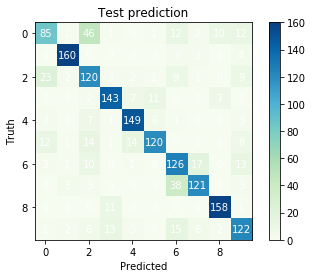

In [8]:
#Plot history of learning DNN model and save like picture
plt.clf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('DNN_learning.png')
#Print confusion matrix of DNN and save
from sklearn.metrics import confusion_matrix
yp=model.predict(X_test)
np.set_printoptions(threshold=np.inf)
Predict_test=np.argmax(yp,axis=1)
cm=confusion_matrix(Y_test,Predict_test)
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.clf()
plt.imshow(cm,cmap = plt.get_cmap('GnBu'))
plt.colorbar()
plt.title("Test prediction")
plt.xlabel('Predicted')
plt.ylabel('Truth')
for i in range(10):
    for j in range(10):
        plt.text(j,i,cm[i,j],ha="center", va="center", color="w")
plt.savefig('DNN_ConfusionMatrix.png')
E1=model.evaluate(X_test,Y_test)

0.7517647058823529


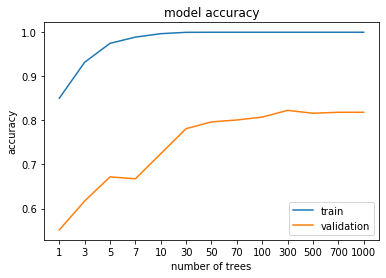

In [9]:
#Random forest learning process
from sklearn.ensemble import RandomForestClassifier
Trees=[1,3,5,7,10,30,50,70,100,300,500,700,1000]
S1=[]
S2=[]
for i in range (len(Trees)):
    model1 = RandomForestClassifier(n_estimators=Trees[i])
    model1.fit(X_train, Y_train)
    S1.append(model1.score(X_train, Y_train))
    S2.append(model1.score(X_validation,Y_validation))
#Plot RF model learning potential and save
plt.clf()
plt.plot(S1)
plt.plot(S2)
plt.xticks(list(range(len(Trees))), Trees)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of trees')
plt.legend(['train', 'validation'], loc='lower right')
plt.savefig('RandomForest_learning.png')
S3=model1.score(X_test,Y_test)
print(S3)

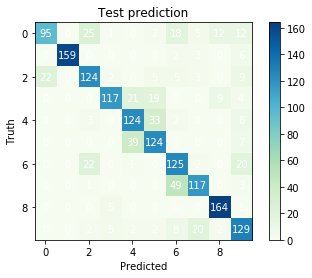

In [10]:
#Plot and save confusion matrix of RF model
Pr1=model1.predict(X_test)
cm=confusion_matrix(Y_test,Pr1)
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.clf()
plt.imshow(cm,cmap = plt.get_cmap('GnBu'))
plt.colorbar()
plt.title("Test prediction")
plt.xlabel('Predicted')
plt.ylabel('Truth')
for i in range(10):
    for j in range(10):
        plt.text(j,i,cm[i,j],ha="center", va="center", color="w")
plt.savefig('RF_ConfusionMatrix.png')